# 3.2 data loading and preparation

In [1]:
# import various packages
import os
import scipy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=True)
# plot settings
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.rcParams['agg.path.chunksize'] = 10000

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.columns = df.columns.str.lower().str.replace(" ","_")
categorical_columns = list(df.select_dtypes(exclude='number'))
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ','_')


In [7]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')

In [8]:
df.seniorcitizen = df.seniorcitizen.astype('object')

In [9]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [10]:
df.totalcharges = df.totalcharges.fillna(0)

In [11]:
df.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [12]:
df.churn = (df.churn == 'yes').astype(int)

# 3.3 Setting up the validation framework

In [13]:
import sklearn
from sklearn.model_selection import train_test_split

In [14]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))


The scikit-learn version is 0.24.1.


In [15]:
X = df.copy()
y = X['churn']

In [16]:
y.isnull().sum()

0

In [17]:
y.values

array([0, 0, 1, ..., 0, 1, 0])

In [18]:
df_full_train, df_test, y_full_train, y_test = train_test_split(X, y.values ,test_size=0.2, random_state=1,stratify=y)

In [19]:
df_train, df_val, y_train, y_val = train_test_split(df_full_train, y_full_train, test_size=0.25, random_state=1, stratify=y_full_train)

# 3.4 EDA

In [20]:
df_full_train = df_full_train.reset_index(drop=True)

In [21]:
df_full_train['churn'] = y_full_train

In [22]:
df_full_train.shape

(5634, 21)

In [23]:
df_full_train.churn.value_counts(normalize=True)

0    0.734647
1    0.265353
Name: churn, dtype: float64

In [24]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

0.27

In [ ]:
df

In [25]:
numerical = list(df_full_train.select_dtypes('number'))
numerical

['tenure', 'monthlycharges', 'totalcharges', 'churn']

In [39]:
categorical = ['seniorcitizen','gender', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [40]:
df_full_train.nunique()

customerid          5634
gender                 2
seniorcitizen          2
partner                2
dependents             2
tenure                73
phoneservice           2
multiplelines          3
internetservice        3
onlinesecurity         3
onlinebackup           3
deviceprotection       3
techsupport            3
streamingtv            3
streamingmovies        3
contract               3
paperlessbilling       2
paymentmethod          4
monthlycharges      1495
totalcharges        5286
churn                  2
dtype: int64

# 3.5 Feature importance: Churn  rate and risk ratio

In [41]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

0.27123483226266953

In [42]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

0.2595338983050847

In [43]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

0.19529238690695108

In [44]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

0.3307032590051458

In [45]:
from IPython.display import display

In [46]:
for c in categorical:
    df_group = df_full_train.groupby(c).churn.agg(['mean','count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)
    print()
    print()

,mean,count,diff,risk
seniorcitizen,,,,
0,0.236909,4736,-0.028444,0.892805
1,0.415367,898,0.150014,1.565338


,mean,count,diff,risk
gender,,,,
female,0.271235,2802,0.005882,1.022165
male,0.259534,2832,-0.005819,0.978070


,mean,count,diff,risk
partner,,,,
no,0.330703,2915,0.065350,1.246276
yes,0.195292,2719,-0.070061,0.735971


,mean,count,diff,risk
dependents,,,,
no,0.310920,3956,0.045567,1.171722
yes,0.157926,1678,-0.107427,0.595154


,mean,count,diff,risk
phoneservice,,,,
no,0.241135,564,-0.024218,0.908731
yes,0.268047,5070,0.002694,1.010153


,mean,count,diff,risk
multiplelines,,,,
no,0.253610,2701,-0.011743,0.955744
no_phone_service,0.241135,564,-0.024218,0.908731
yes,0.284508,2369,0.019155,1.072187


,mean,count,diff,risk
internetservice,,,,
dsl,0.186571,1951,-0.078782,0.703104
fiber_optic,0.421308,2478,0.155954,1.587723
no,0.072199,1205,-0.193154,0.272087


,mean,count,diff,risk
onlinesecurity,,,,
no,0.416844,2814,0.151491,1.570904
no_internet_service,0.072199,1205,-0.193154,0.272087
yes,0.145511,1615,-0.119842,0.548367


,mean,count,diff,risk
onlinebackup,,,,
no,0.405329,2477,0.139976,1.527508
no_internet_service,0.072199,1205,-0.193154,0.272087
yes,0.206967,1952,-0.058386,0.779969


,mean,count,diff,risk
deviceprotection,,,,
no,0.387994,2482,0.122640,1.462178
no_internet_service,0.072199,1205,-0.193154,0.272087
yes,0.228557,1947,-0.036796,0.861330


,mean,count,diff,risk
techsupport,,,,
no,0.412864,2783,0.147511,1.555903
no_internet_service,0.072199,1205,-0.193154,0.272087
yes,0.157351,1646,-0.108002,0.592988


,mean,count,diff,risk
streamingtv,,,,
no,0.333333,2253,0.067980,1.256187
no_internet_service,0.072199,1205,-0.193154,0.272087
yes,0.301930,2176,0.036577,1.137842


,mean,count,diff,risk
streamingmovies,,,,
no,0.332283,2221,0.066930,1.252228
no_internet_service,0.072199,1205,-0.193154,0.272087
yes,0.303442,2208,0.038089,1.143540


,mean,count,diff,risk
contract,,,,
month-to-month,0.427147,3109,0.161794,1.60973
one_year,0.113322,1156,-0.152031,0.42706
two_year,0.026297,1369,-0.239057,0.09910


,mean,count,diff,risk
paperlessbilling,,,,
no,0.164431,2311,-0.100922,0.619668
yes,0.335540,3323,0.070187,1.264504


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.163415,1230,-0.101939,0.615838
credit_card_(automatic),0.148088,1229,-0.117265,0.558078
electronic_check,0.461168,1867,0.195814,1.737939
mailed_check,0.191896,1308,-0.073457,0.723172


# 3.6 Feature importance: Mutual information

In [47]:
from sklearn.metrics import mutual_info_score

In [48]:
mutual_info_score(df_full_train.churn, df_full_train.partner)

0.011890648489654987

In [49]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [50]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.099897
onlinesecurity      0.064945
techsupport         0.061113
internetservice     0.057089
onlinebackup        0.049642
paymentmethod       0.047671
deviceprotection    0.043155
streamingtv         0.032027
streamingmovies     0.031957
paperlessbilling    0.018931
dependents          0.013436
partner             0.011891
seniorcitizen       0.010170
multiplelines       0.000715
phoneservice        0.000170
gender              0.000088
dtype: float64

# 3.7 Feature importance: Correlation

<AxesSubplot:>

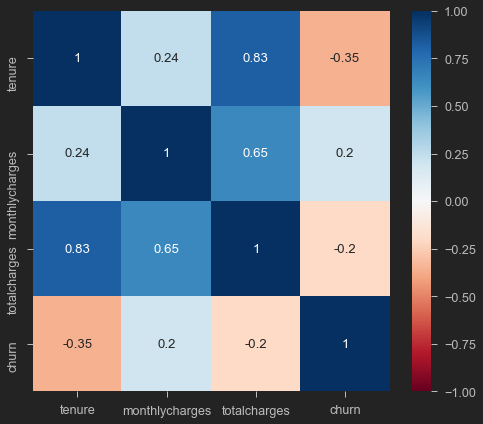

In [51]:
sns.heatmap(df_full_train.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)

In [58]:
df_full_train[df_full_train.tenure > 12].churn.mean()

0.16996657238364618